In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from matplotlib import pyplot
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

Amazon_Unlocked_Mobile.csv



In [2]:
Data=pd.read_csv("../input/Amazon_Unlocked_Mobile.csv")
Data=Data.dropna(axis=0)

<h1>Code </h1>

In [3]:
def ReviewLength(Dat):
    
    Dat.dropna(axis=0)
    Price=np.asarray(Dat['Price'])
    Review_Length=np.asarray(Dat['Reviews'].str.len())
    return(Review_Length,Price)

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def Phone_Stat(Dataframe):

    Phones={}

    for i,j in Dataframe.iterrows():
    
          if(j['Product Name'] in Phones):
        
                  Phones[j['Product Name']].append(j['Rating'])
        
          else:
        
                  Phones[j['Product Name']]=[j['Rating']]
        
 
    Mean=[]
    Product=[]
    SD=[]
    N=[]

    for i in Phones:

        Mean.append(np.asarray(Phones[i]).mean())
        Product.append(i)
        SD.append(np.asarray(Phones[i]).std())
        N.append(len(Phones[i]))
        
    Phone_Stat={'Product':Product,
                 'Mean':Mean,
                 'SD':SD,
                 'Number':N}

    Phone_Stat=pd.DataFrame(Phone_Stat)
    Phone_Stat.sort_values(['Mean','Number'],ascending=False)
    
    return Phone_Stat

In [5]:
def Word_Freq(Data):
    
     Words={}
     for i in Data['Reviews']:
            Word_List=word_tokenize(i)
            for j in Word_List:
                    if(j in Words):
                             Words[j]+=1
                    else:
            
                             Words[j]=1
            
     Keys=[] 
     Values=[]
     
     Custom=[]
     stop_words=set(stopwords.words("english"))
     Custom.append("phone")
     Custom.append("The")

     for i in Words:
    
                if(i not in stop_words and i.isalpha() and i not in Custom):
        
                        Keys.append(i)
                        Values.append(Words[i])

     Word_Stat={'Word':Keys,'Count':Values}
     Word_Stat=pd.DataFrame(Word_Stat) 
     Word_Stat=Word_Stat.sort_values(['Count'],ascending=False)
        
     return(Word_Stat[1:30])
 

In [6]:
def Tokenize_n_Filter(Data,Word):
    
    New_Data=[]
    for i in Data['Reviews']:
        tokens=nltk.word_tokenize(i)
        for j in range(0,len(tokens)):
            
            if(tokens[j]==Word):
                
                New_Data.append(i)
                j=len(tokens)
    Data={'Reviews':New_Data}
    New_Data=pd.DataFrame(Data)
    return(New_Data)
            

In [7]:
def ReviewString(Data):
    
    Corpus=""
    
    for i in Data:
        
        Corpus+=Data
        
    return(Corpus)

<h1>Overall Analysis</h1>

<h2>Dataset</h2>

In [8]:
Data.sample(frac=0.1).head(n=7)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
282949,OtterBox 'Defender Series' Protective Case for...,OtterBox,16.90,5,AWESOME,0.0
313450,Samsung Galaxy Grand Prime DUOS G531H/DS - Gra...,Samsung,179.99,4,I love this phone. The price was right for my ...,1.0
385105,"Samsung T139 Unlocked Phone with Camera, Bluet...",Samsung,33.95,3,My husband hated my old Blackberry Storm and w...,2.0
384483,Samsung SGH a777 - Cellular phone - 3G - WCDMA...,Samsung,99.99,5,excellent,0.0
300765,"POSH Titan HD E500a - 5.0"" HD, 4G, Android 4.4...",Posh Mobile,75.41,5,"Was looking for a good, non-expensive replacem...",3.0
230415,"LG Nexus 5X Unlocked Smart Phone, 5.2"" Quartz ...",LG Electronics,399.00,1,Do not order this phone as it does not work wi...,0.0
35496,Apple iPhone 5c 8GB Unlocked GSM Smartphone - ...,Apple,115.00,5,perfectly received . No problem,0.0


**Product Name**: Name of the mobile phone  

**Brand Name**: Brand of the mobile phone 

**Price**: Price of the mobile phone 

**Rating**: Ratings given to the mobile phone by users who bought the phone on a scale(1-5)

**Reviews**: Review by the user who rated the given phone

**Review Rating**: Ratings given to the review indicating how useful the rating was





In [9]:
Data.describe()

,Price,Rating,Review Votes
count,334335.000000,334335.000000,334335.000000
mean,222.585019,3.824888,1.474515
std,283.139353,1.541203,9.217348
min,1.730000,1.000000,0.000000
25%,75.410000,3.000000,0.000000
50%,139.000000,5.000000,0.000000
75%,264.100000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


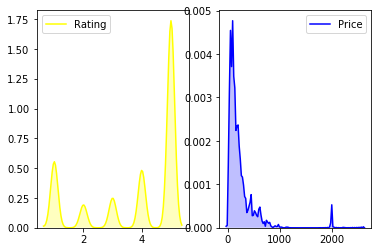

In [10]:
fig, ax =plt.subplots(1,2)
sns.kdeplot(Data['Rating'],shade=True,color="yellow",ax=ax[0])
sns.kdeplot(Data['Price'],shade=True,color="blue",ax=ax[1])
fig.show()

<h3>Unlocked Mobiles with highest Reviews</h3>

In [11]:
Data['Product Name'].value_counts().head(n=10)

BLU Studio 5.0 C HD Unlocked Cellphone, Black                                             1122
OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink     1115
Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version - Black    1084
Motorola Moto E (1st Generation) - Black - 4 GB - Global GSM Unlocked Phone               1069
BLU Energy X Plus Smartphone - With 4000 mAh Super Battery- US GSM Unlocked - Grey        1065
Apple iPhone 5s 32GB (Silver) - AT&T                                                      1060
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White       1059
Apple iPhone 4S 16GB Unlocked GSM - White (Certified Refurbished)                         1044
Samsung Galaxy S4 i9505 16GB LTE Unlocked International Version White                     1041
BLU Energy X Plus Smartphone - With 4000 mAh Super Battery- Global GSM Unlocked - Grey    1012
Name: Product Name, dtype: int64

<h3>Reviews Distribution by Price Category </h3>

Lets divide the data set into two classes: phones above $250  and below $250.

In [12]:
Expensive=Data[Data['Price']>250]
N_Expensive=Data[Data['Price']<250]

In [13]:
len(Expensive)

84518

In [14]:
len(N_Expensive)

249283

In [15]:
(len(Expensive)/float(len(Expensive)+len(N_Expensive)))*100

25.319876213672217

~25.4%  phones are above 250$

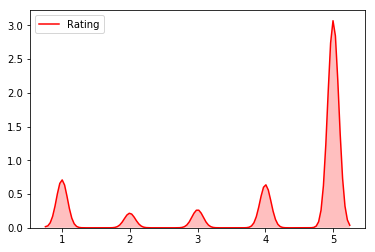

In [16]:
sns.kdeplot(Expensive['Rating'],shade=True,color="red")

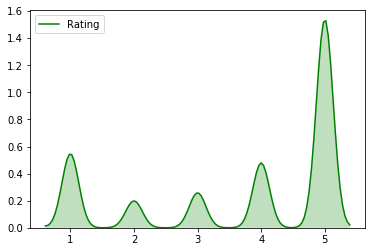

In [17]:
sns.kdeplot(N_Expensive['Rating'],shade=True,color="green")

**  Overall , It could be infered that pricing has some  effect on the ratings of phones.Phones with higher price have had higher ratings.**

<h2>Review Votes Distribution</h2>

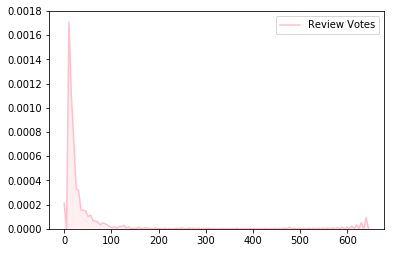

In [18]:
sns.kdeplot(Data['Review Votes'],shade=True,color="pink")

<h2>Reviews Analysis</h2>

<h3>Length of Reviews</h3>

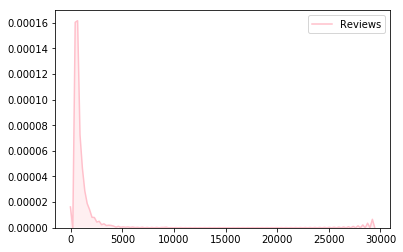

In [19]:
sns.kdeplot(Data['Reviews'].str.len(),shade=True,color="pink")

<h3>Relationship between Price and Ratings</h3>

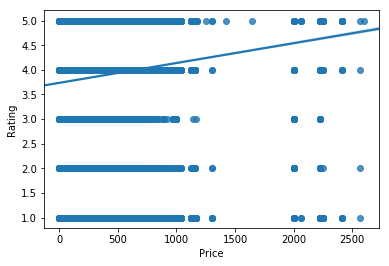

In [20]:
sns.regplot(x='Price',y='Rating',data=Data)

The trend noticed that the rating of phone is higher with  the price. 

<h3>Relationship between Price of Phone and Reviews Rating</h3>

KeyboardInterrupt: 

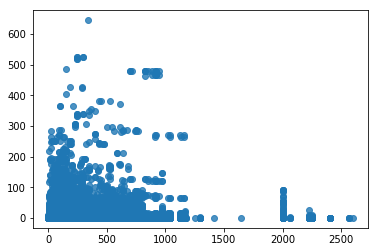

In [22]:
sns.regplot(x='Price',y='Review Votes',data=Data)

<h3> Relationship between Price of Phone and Review Lengths</h3>

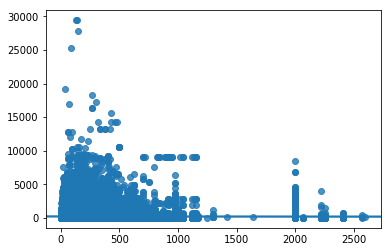

In [21]:
Review_Length,Price=ReviewLength(Data)
sns.regplot(x=Price,y=Review_Length)

In [ ]:
print(Review_Length.mean())

Average length of ~400,000 reviews is 218.076

**It could be infered that review length , pricing and ratings have no relation.**

<h3>Review Votes Distribution</h3>

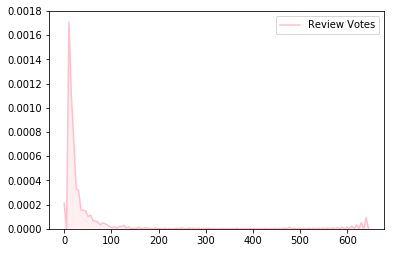

In [28]:
sns.kdeplot(Data['Review Votes'],shade=True,color="pink")

From the above plots we could infer that Ratings are less dependent on Pricing overall. It might be a differ from brand to brand though.

<h1>Analysis By Brand</h1>

While the above section was based on overall analysis of data. Lets further investigate phones by brands.For a reasonable amount of data per brand , we could infer various results. In the below section lets investigate various trends in few selected brands in the top 10 list.

In [29]:
Top_B=Data['Brand Name'].value_counts().head(n=5).index.tolist()
print(Data['Brand Name'].value_counts().head(n=10))

Samsung       63038
BLU           59168
Apple         56101
LG            21636
BlackBerry    16504
Nokia         16166
Motorola      13003
HTC           12341
CNPGD         12302
OtterBox       7880
Name: Brand Name, dtype: int64


In [30]:
Length=(Data['Brand Name'].value_counts().sum())
print((Data['Brand Name'].value_counts().head(n=10).sum())/(Length)*100)

83.1917089147113


The top 10 brands make up for 83.1788% of the phones in the dataset. 

In [31]:
new_Df=pd.DataFrame()

Phones_B=[]

for i in Data['Brand Name'].value_counts().head(n=10).index.tolist():
    
    Phones_B.append(i)
    
for j in Phones_B:
  
    new_Df=new_Df.append(Data[Data['Brand Name']==j])

In [32]:
new_Df.head(n=5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


<h3>Top 10 Brands Ratings</h3>

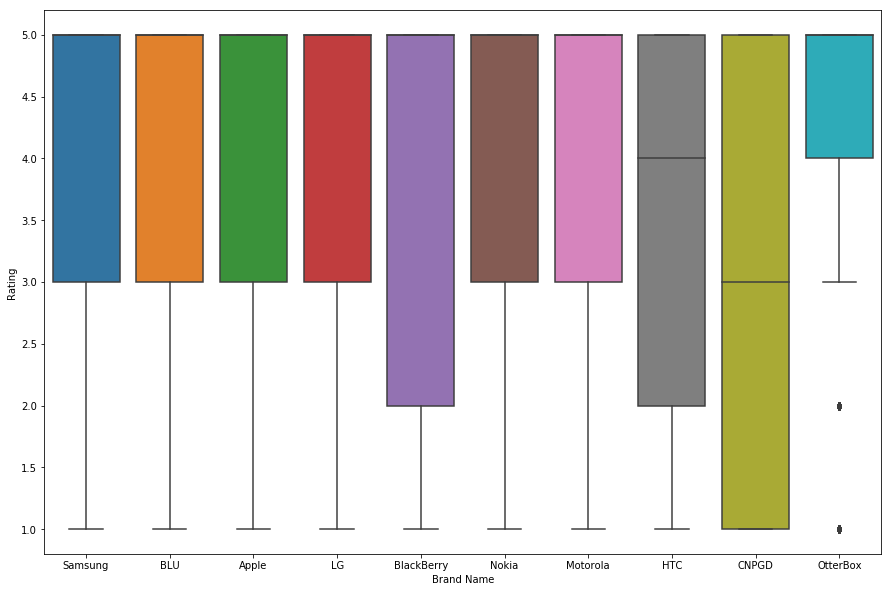

In [33]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(x="Brand Name",y="Rating",data=new_Df,ax=ax)

<h3>Top 10 Brands Pricing</h3>

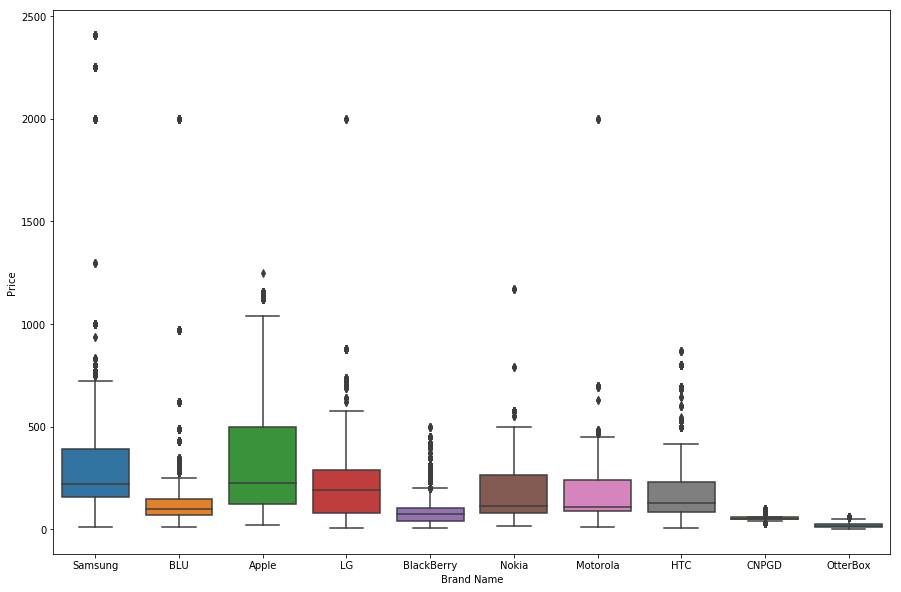

In [34]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(x="Brand Name",y="Price",data=new_Df,ax=ax)

<h3>Top 10 Brands Review Lengths</h3>

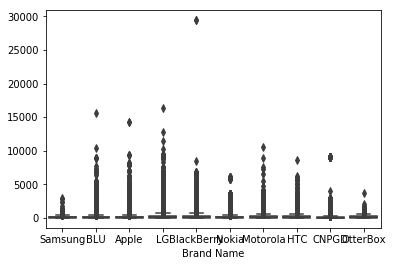

In [35]:
Data_RL,Data_P=ReviewLength(new_Df)
sns.boxplot(x="Brand Name",y=Data_RL,data=new_Df)

<h2>Samsung</h2>

In [36]:
Samsung=Data[Data['Brand Name']=='Samsung']

<h3>Rating Distribution</h3>

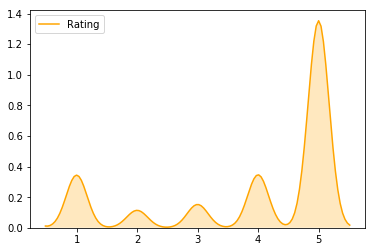

In [37]:
sns.kdeplot(Data[Data['Brand Name']=='Samsung']['Rating'],shade=True,color="orange")

<h3>Pricing Distributon</h3>

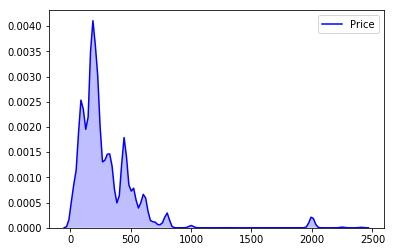

In [38]:
sns.kdeplot(Data[Data['Brand Name']=='Samsung']['Price'],shade=True,color="blue")

<h3>Top 10 Samsung Phones</h3>

In [39]:
print(Samsung['Product Name'].value_counts().head(n=10))

Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version - Black                               1084
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White                                  1059
Samsung Galaxy S4 i9505 16GB LTE Unlocked International Version White                                                1041
Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM Factory Unlocked GSM International Version no warranty (BLUE CORAL)     920
Samsung Galaxy Exhibit 4G (T-Mobile), t679                                                                            881
Samsung Galaxy S3 SGH-i747 4G LTE GSM Unlocked 16GB No Warranty (White)                                               873
Samsung Galaxy S5 Mini G800H Unlocked Cellphone, International Version, 16GB, White                                   865
Samsung S5830 Galaxy Ace - Unlocked Phone - Black                                                                     848
Samsung Galaxy Note I717

In [40]:
print(((Samsung['Product Name'].value_counts().head(n=10).sum())/len(Samsung))*100)

14.670516196579841


The top 10 phones account for just 14.69% of Samsung phones in the dataset.

<h2>Highest Rated Phones</h2>

In [41]:
Samsung_Phones=Samsung['Product Name']

Samsung Galaxy Exhibit 4G (T-Mobile), t679
Samsung Galaxy G920F-S6 32GB Factory Unlocked 5.1" - International Sourced Version - Black
Samsung Galaxy Grand Prime Dual Sim Factory Unlocked Phone - Retail Packaging - Gold(International Version)
Samsung Galaxy Note I717 16GB 4G LTE GSM Android Phone - Carbon Blue (AT&T version)
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White
Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version - Black
Samsung Galaxy S3 SGH-i747 4G LTE GSM Unlocked 16GB No Warranty (White)
Samsung Galaxy S4 i9505 16GB LTE Unlocked International Version White
Samsung Galaxy S4 SGH-I337 Unlocked GSM Smartphone w/ 13 MP Camera - Red (No Warranty)
Samsung Galaxy S5 Mini G800H Unlocked Cellphone, International Version, 16GB, White
Samsung Galaxy S6 G920F 32GB Factory Unlocked GSM 4G LTE Octa-Core Smartphone - Blue Topaz
Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM Factory Unlocked GSM International Version no warrant

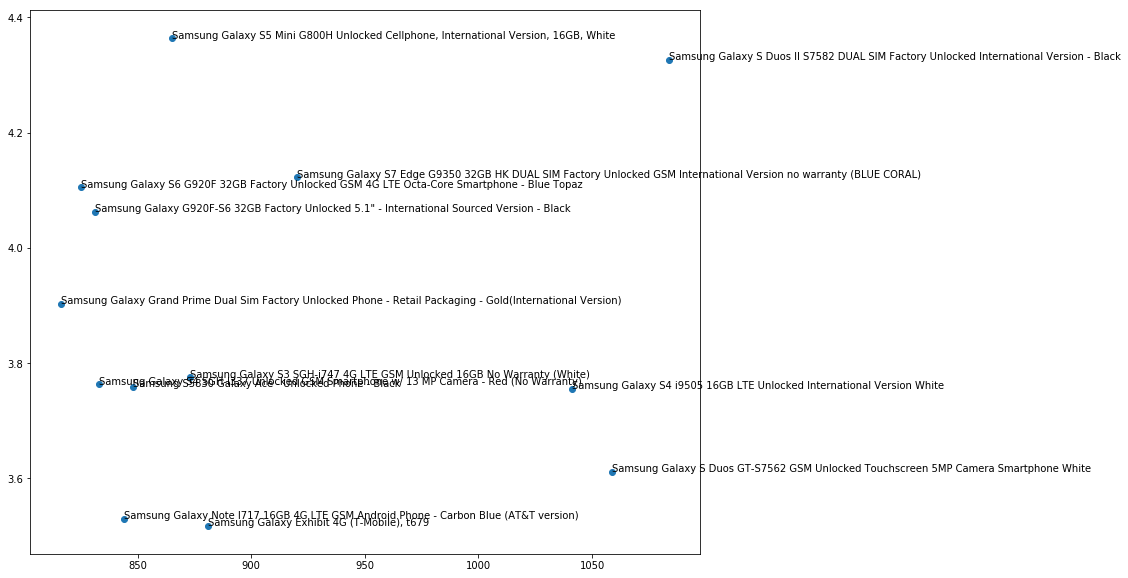

In [42]:
S_Phone_Stat=Phone_Stat(Samsung)
four=S_Phone_Stat[S_Phone_Stat['Number']>800]
  
plt.figure(figsize=(12,10))    
for i in four.iterrows():

    plt.text(i[1]['Number'],i[1]['Mean'],i[1]['Product'],fontsize=10)
    print(i[1]['Product'])
     
plt.scatter('Number','Mean',data=four)
plt.show()

From the above it could be noted that the most popular phones have been:

 1. Samsung Galaxy 5 Duos II S7582 DUAL SIM FACTORY 
      Unlocked International Version-Black                
 2. Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM Factory 
     Unlocked GSM International Version no warranty  (BLUE CORAL)                                              
 3. Samsung Galaxy S5 Mini G800H Unlocked Cellphone
     International Version 16GB White

<h2>Reviews Analysis</h2>

<h3>Overall Word Frequencies</h3>

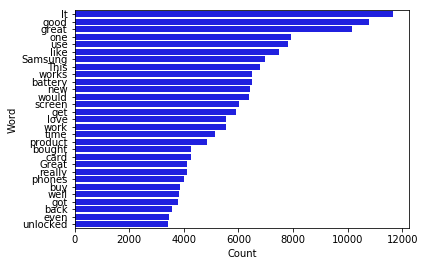

In [43]:
sns.barplot(x="Count",y="Word",data=Word_Freq(Samsung),color="b")

<h3>Negative Word Frequencies</h3>

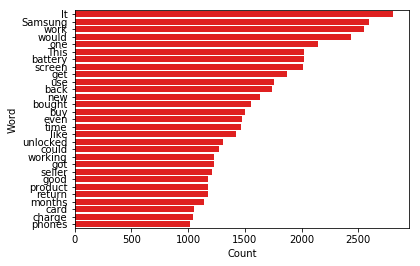

In [44]:
sns.barplot(x="Count",y="Word",data=Word_Freq(Samsung[Samsung['Rating']<3]),color="r")

<h3>Positive Word Frequencies</h3>

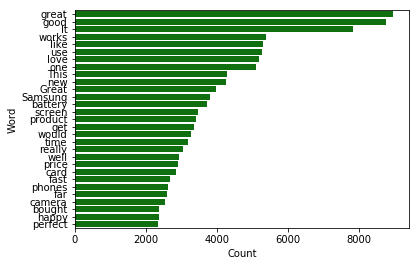

In [45]:
sns.barplot(x="Count",y="Word",data=Word_Freq(Samsung[Samsung['Rating']>3]),color="g")

</h3>Relation between Price and Length of Reviews</h3>

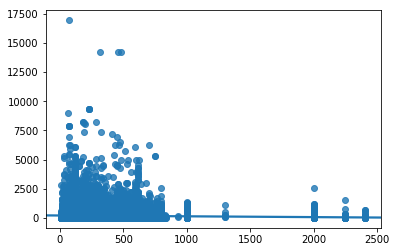

In [47]:
Samsung_RL,Samsung_P=ReviewLength(Samsung)
sns.regplot(x=Samsung_P,y=Samsung_RL)

In [ ]:
from gensim.models import Word2Vec
import gensim.models.lsimodel 
from gensim.corpora import Dictionary
import gensim
from gensim import corpora

In [ ]:
Samsung_Reviews=Samsung[Samsung['Rating']>3]['Reviews'].values.tolist()
Samsung_Tok=[nltk.word_tokenize(sent) for sent in Samsung_Reviews]

In [ ]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in ReviewString(Samsung['Reviews'])]

In [ ]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [ ]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
Lda = gensim.models.ldamodel.LdaModel
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

<h2>Apple</h2>

In [48]:
Apple=Data[Data['Brand Name']=='Apple']

<h3>Top 10 Apple Phones</h3>

In [49]:
print(Apple['Product Name'].value_counts().head(n=10))

Apple iPhone 5s 32GB (Silver) - AT&T                                 1060
Apple iPhone 4S 16GB Unlocked GSM - White (Certified Refurbished)    1044
Apple iPhone 5s AT&T Cellphone, 16GB, Silver                         1002
Apple iPhone 4 32GB (Black) - AT&T                                    972
Apple iPhone 5s 32GB (Gold) - AT&T                                    961
Apple iPhone 4S 16GB (Black) - Verizon                                853
Apple iPhone 5c 8GB Unlocked GSM Smartphone - Green                   811
Apple iPhone 6 Plus 64GB Gold (Factory Unlocked)                      799
Apple iPhone 5s AT&T Cellphone, 16GB, Gold                            762
Apple iPhone 5c 8GB (Yellow) - Verizon Wireless                       755
Name: Product Name, dtype: int64


In [50]:
print(((Apple['Product Name'].value_counts().head(n=10).sum())/len(Apple))*100)

16.07636227518226


The top 10 phones account for just 16.076% of Apple phones in the dataset.

<h3>Rating Distribution</h3>

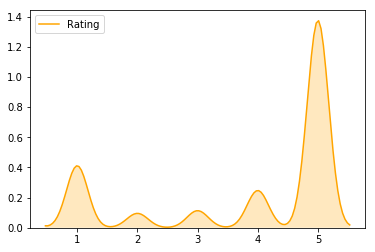

In [51]:
sns.kdeplot(Data[Data['Brand Name']=='Apple']['Rating'],shade=True,color="orange")

<h3>Pricing Distribution</h3>

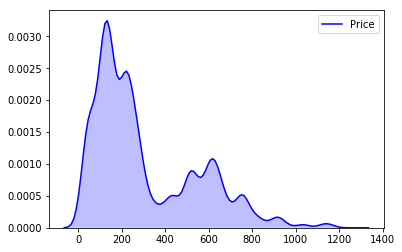

In [52]:
sns.kdeplot(Data[Data['Brand Name']=='Apple']['Price'],shade=True,color="blue")

<h3>Highest Rated Apple Phones</h3>

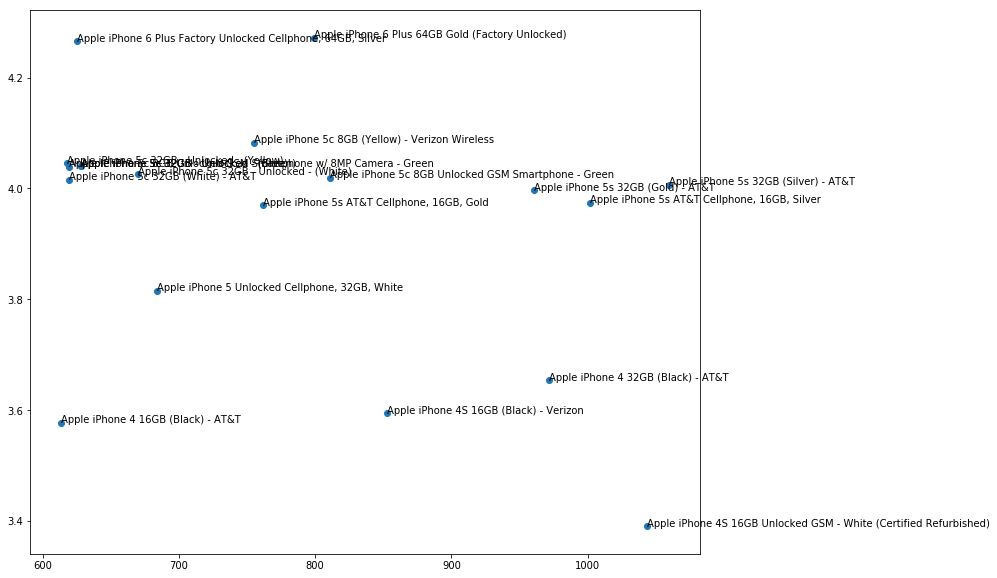

In [53]:
A_Phone_Stat=Phone_Stat(Apple)
four_A=A_Phone_Stat[A_Phone_Stat['Number']>600]
  
plt.figure(figsize=(12,10))    
for i in four_A.iterrows():

    plt.text(i[1]['Number'],i[1]['Mean'],i[1]['Product'],fontsize=10)
     
plt.scatter('Number','Mean',data=four_A)
plt.show()

<h2>Reviews Analysis</h2>

<h3>Overall Word Frequencies</h3>

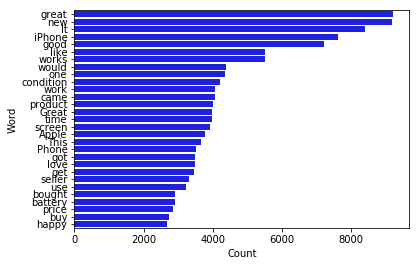

In [54]:
sns.barplot(x="Count",y="Word",data=Word_Freq(Apple),color="b")

<h3>Negative Word Frequencies</h3>

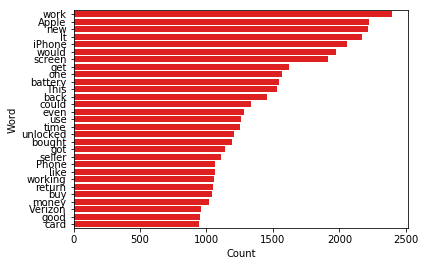

In [58]:
sns.barplot(x="Count",y="Word",data=Word_Freq(Apple[Apple['Rating']<3]),color="r")

<h3>Positive Word Frequencies</h3>

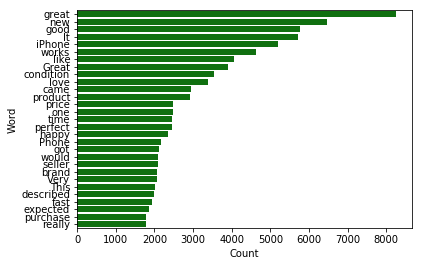

In [59]:
sns.barplot(x="Count",y="Word",data=Word_Freq(Apple[Apple['Rating']>3]),color="g")

</h3>Relation between Price and Length of Reviews</h3>

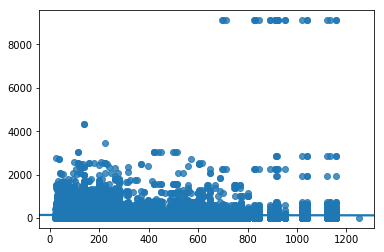

In [62]:
Apple_RL,Apple_P=ReviewLength(Apple)
sns.regplot(x=Apple_P,y=Apple_RL)

<h2>HTC</h2>

In [65]:
HTC=Data[Data['Brand Name']=='HTC']

<h3>Ratings Distribution</h3>

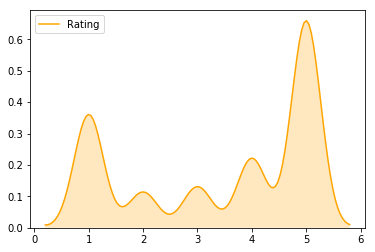

In [64]:
sns.kdeplot(Data[Data['Brand Name']=='HTC']['Rating'],shade=True,color="orange")

<h3>Pricing Distribution</h3>

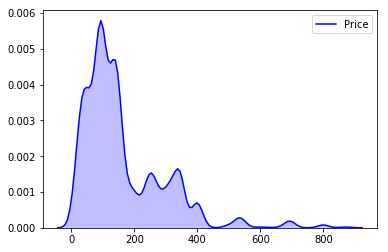

In [66]:
sns.kdeplot(Data[Data['Brand Name']=='HTC']['Price'],shade=True,color="blue")

<h3>Top 10 HTC Phones</h3>

In [67]:
print(HTC['Product Name'].value_counts().head(n=10))

HTC One M8 - Factory Unlocked 32GB - US Warranty (Glacial Silver)                                   785
HTC 1 X Unlocked GSM Android Smartphone with Beats Audio Sound and Front-Facing Speakers - White    725
HTC DROID INCREDIBLE ADR 6300 3G Android Phone Black (Verizon Wireless)                             621
HTC One X Unlocked Gsm Phone, 16GB, Gray                                                            567
HTC One M7 32GB GSM Unlocked 4G LTE Android Smartphone - Black                                      436
HTC EVO Design SL892 Android Phone (BOOST MOBILE) Evo Design 4G by HTC (Boost)‎                     420
HTC One M9 32GB Unlocked GSM 4G LTE Smartphone w/ 20MP Camera - Amber Gold                          396
HTC One M7 32GB Unlocked GSM 4G LTE Android Cell Phone - Silver                                     379
HTC One M7 32GB Unlocked GSM 4G LTE Android Cell Phone - Black                                      299
HTC One M7 Blue 32GB Unlocked Smart Phone 3/4G LTE              

<h3>Highest Rated HTC Phones</h3>

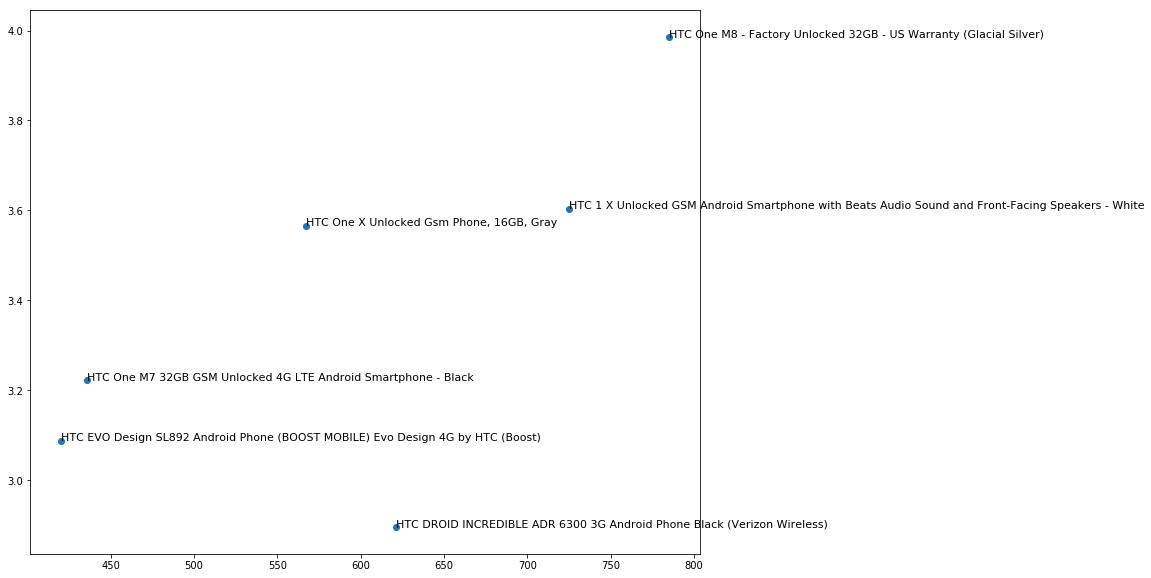

In [68]:
H_Phone_Stat=Phone_Stat(HTC)
four_H=H_Phone_Stat[H_Phone_Stat['Number']>400]
  
plt.figure(figsize=(12,10))    
for i in four_H.iterrows():

    plt.text(i[1]['Number'],i[1]['Mean'],i[1]['Product'],fontsize=11)
     
plt.scatter('Number','Mean',data=four_H)
plt.show()

In [69]:
print(((HTC['Product Name'].value_counts().head(n=10).sum())/len(HTC))*100)

39.915728060935095


Top 10 HTC phones make up 39.916% of HTC phones in Amazon Unlocked sales.

<h3>Reviews Analysis</h3>

<h3>Overall Frequency</h3>

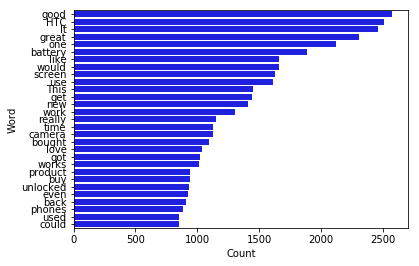

In [70]:
sns.barplot(x="Count",y="Word",data=Word_Freq(HTC),color="b")

<h3>Negative Frequency</h3>

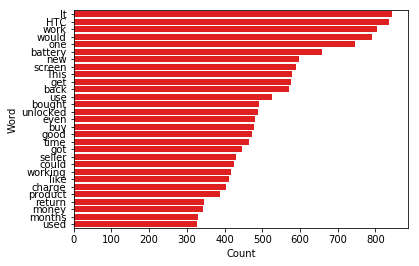

In [72]:
sns.barplot(x="Count",y="Word",data=Word_Freq(HTC[HTC['Rating']<3]),color="r")

<h3>Positive Frequency</h3>

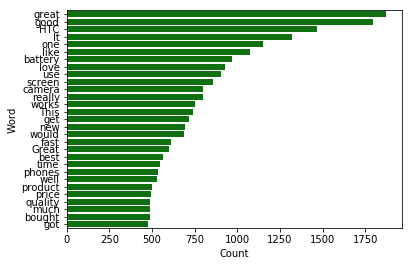

In [73]:
sns.barplot(x="Count",y="Word",data=Word_Freq(HTC[HTC['Rating']>3]),color="g")

<h3>Relation between Price and Review Length</h3>

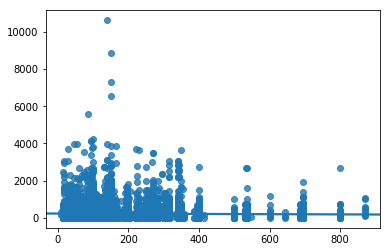

In [74]:
HTC_RL,HTC_P=ReviewLength(HTC)
sns.regplot(x=HTC_P,y=HTC_RL)

<h2>CNPGD </h2>

In [75]:
CNPGD=Data[Data['Brand Name']=='CNPGD']

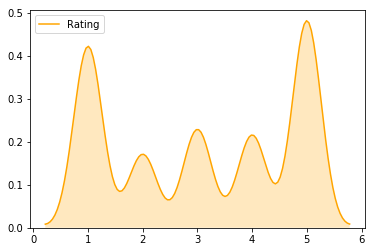

In [76]:
sns.kdeplot(Data[Data['Brand Name']=='CNPGD']['Rating'],shade=True,color="orange")

<h3>Pricing Distribution</h3>

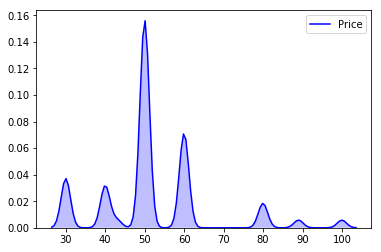

In [77]:
sns.kdeplot(Data[Data['Brand Name']=='CNPGD']['Price'],shade=True,color="blue")

<h3>Top 10 CNPGD Phones</h3>

In [78]:
print(CNPGD['Product Name'].value_counts().head(n=10))

CNPGD All-in-1 Watch Cell Phone & Smart Watch Sync to Android IOS Smart Phone (Black Plus)                                                                            964
CNPGD [U.S. Office Extended Warranty] Smartwatch + Unlocked Watch Cell Phone All in 1 Bluetooth Watch for iPhone Android Samsung Galaxy Note,Nexus,htc,Sony Silver    903
CNPGD [U.S. Office Extended Warranty] Smartwatch + Unlocked Watch Cell Phone All in 1 Bluetooth Watch for iPhone Android Samsung Galaxy Note,Nexus,htc,Sony White     893
CNPGD [U.S. Warranty] All-in-1 Smartwatch and Watch Cell Phone Red                                                                                                    879
CNPGD [U.S. Warranty] All-in-1 Smartwatch and Watch Cell Phone Gold                                                                                                   874
CNPGD All-in-1 Watch Cell Phone & Smart Watch Sync to Android IOS Smart Phone (Gold)                                                                  

In [79]:
print(((CNPGD['Product Name'].value_counts().head(n=10).sum())/len(CNPGD))*100)

66.92407738579092


The top 10 CNPGD phones make up for 67.30% of all CNPGD phones in Amazon Unlocked sale.

<h2>Reviews Analysis</h2>

<h3>Overall Frequency</h3>

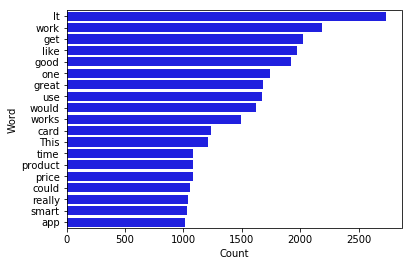

In [80]:
sns.barplot(x="Count",y="Word",data=Word_Freq(CNPGD)[1:20],color="b")

<h3>Positive Frequency</h3>

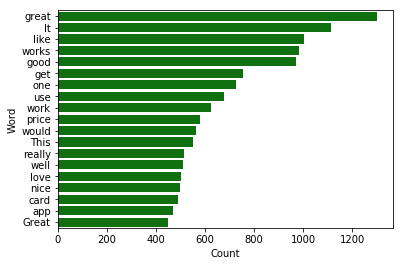

In [81]:
sns.barplot(x="Count",y="Word",data=Word_Freq(CNPGD[CNPGD['Rating']>3])[1:20],color="g")

<h2>Negative Frequency</h2>

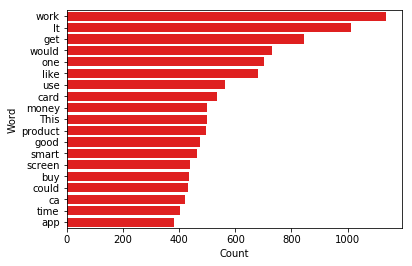

In [82]:
sns.barplot(x="Count",y="Word",data=Word_Freq(CNPGD[CNPGD['Rating']<3])[1:20],color="r")

<h3>Relation between Price and Review Length</h3>

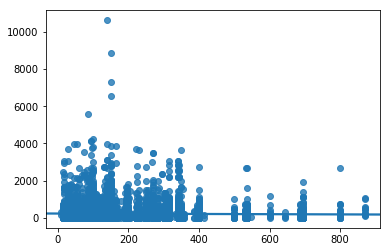

In [83]:
CNPGD_RL,CNPGD_P=ReviewLength(HTC)
sns.regplot(x=CNPGD_P,y=CNPGD_RL)

<h3>Highest Rated CNPGD Phones</h3>

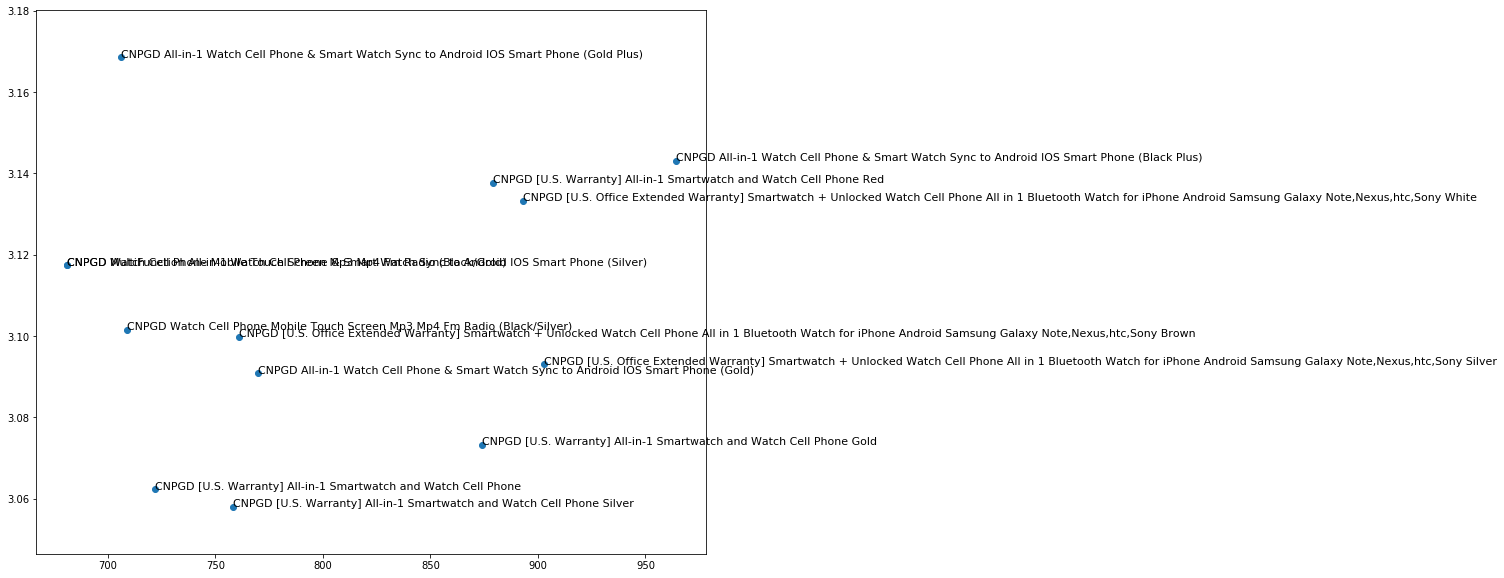

In [84]:
CNP_Phone_Stat=Phone_Stat(CNPGD)
four_CNP=CNP_Phone_Stat[CNP_Phone_Stat['Number']>400]
  
plt.figure(figsize=(12,10))    
for i in four_CNP.iterrows():

    plt.text(i[1]['Number'],i[1]['Mean'],i[1]['Product'],fontsize=11)
     
plt.scatter('Number','Mean',data=four_CNP)
plt.show()

<h2>OtterBox</h2>

In [85]:
OtterBox=Data[Data['Brand Name']=='OtterBox']

<h3>Ratings Distribution</h3>

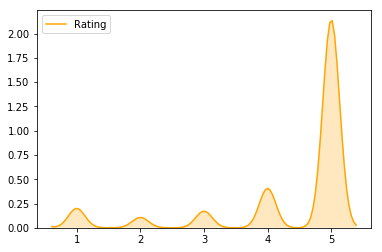

In [86]:
sns.kdeplot(Data[Data['Brand Name']=='OtterBox']['Rating'],shade=True,color="orange")

<h3>Pricing Distribution</h3>

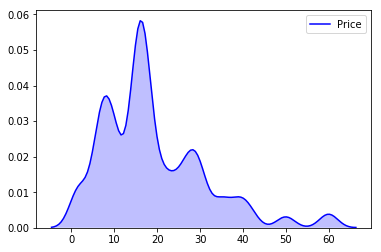

In [87]:
sns.kdeplot(Data[Data['Brand Name']=='OtterBox']['Price'],shade=True,color="blue")

<h3> Top 10 OtterBox Phones</h3>

In [88]:
print(OtterBox['Product Name'].value_counts().head(n=10))

OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink                                                     1115
OtterBox 77-29864 Defender Series Hybrid Case for Samsung Galaxy Note 10.1 - Retail Packaging - White (2012 Version)                       833
Otterbox Otterbox Defender Carrying Case for Samsung Galaxy S4 - Retail Packaging - Eden                                                   732
OtterBox Protective Defender Case for Apple iPhone 5, iPhone 5s, and iPhone SE - White/Pink (Retail Packaging)                             509
OtterBox SYMMETRY SERIES Case for iPhone 6 Plus/6s Plus (5.5" Version) - Retail Packaging - BLUE PRINT II (SLATE GREY/DEEP WATER BLUE)     479
Iphone 5 & 5S Replacement Belt Clip for OtterBox Defender Cases                                                                            449
OtterBox Rugged Original Case w/ 3-Layer Proection for Apple iPhone 5/5S/SE (Defender Series) - AP Pink                                    425

In [89]:
print(((OtterBox['Product Name'].value_counts().head(n=10).sum())/len(OtterBox))*100)

68.74365482233502


Top 10 OtterBox phones make up for 68.65% of all OtterBox phones.

<h2>Reviews Analysis</h2>

<h3>Overall Frequency</h3>

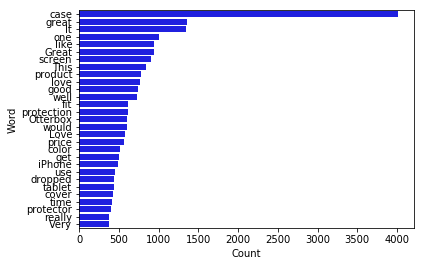

In [90]:
sns.barplot(x="Count",y="Word",data=Word_Freq(OtterBox),color="b")

<h3>Positive Frequency</h3>

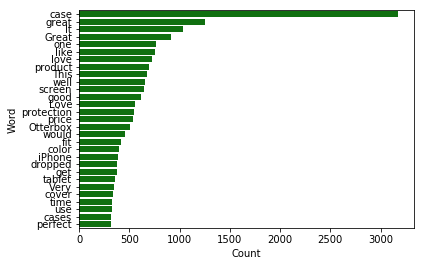

In [91]:
sns.barplot(x="Count",y="Word",data=Word_Freq(OtterBox[OtterBox['Rating']>3]),color="g")

<h3>Negative Frequency</h3>

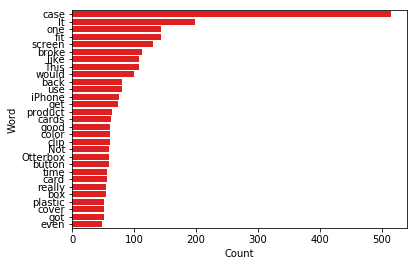

In [92]:
sns.barplot(x="Count",y="Word",data=Word_Freq(OtterBox[OtterBox['Rating']<3]),color="r")

<h3>Relation between Price and Length Review</h3>

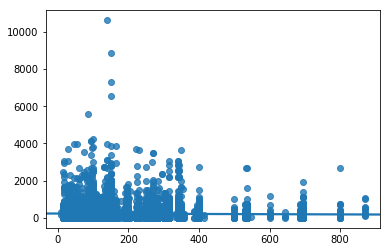

In [93]:
HTC_RL,HTC_P=ReviewLength(HTC)
sns.regplot(x=HTC_P,y=HTC_RL)

<h3>Top Rated Phones </h3>

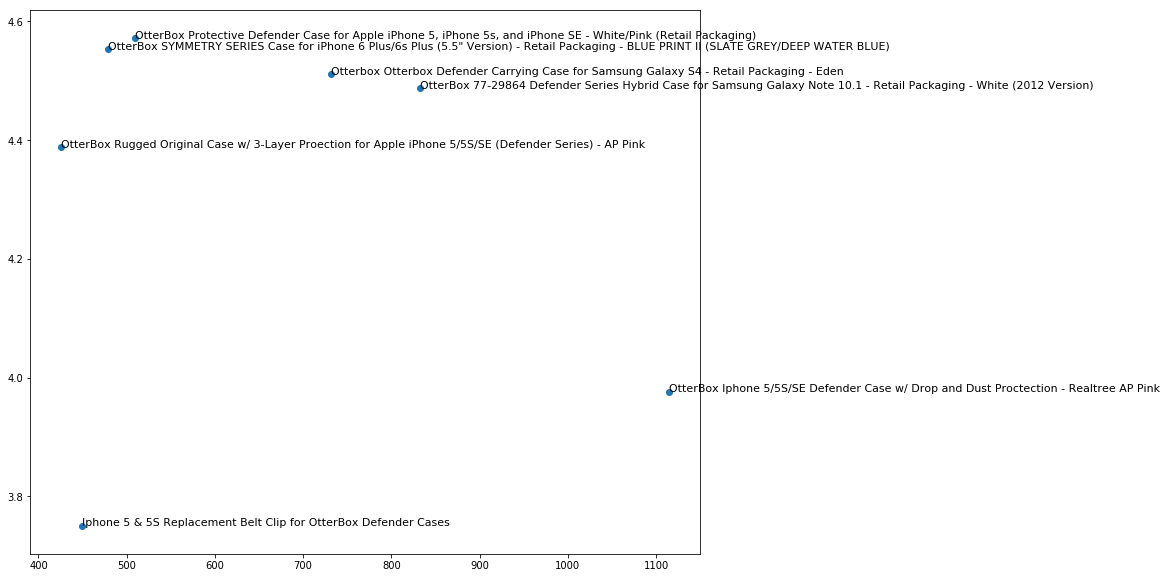

In [94]:
OT_Phone_Stat=Phone_Stat(OtterBox)
four_OT=OT_Phone_Stat[OT_Phone_Stat['Number']>400]
  
plt.figure(figsize=(12,10))    
for i in four_OT.iterrows():

    plt.text(i[1]['Number'],i[1]['Mean'],i[1]['Product'],fontsize=11)
     
plt.scatter('Number','Mean',data=four_OT)
plt.show()